In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.linear_model import LinearRegression
import requests

In [2]:
df = pd.read_csv(r"D:\API_SP.DYN.TFRT.IN_DS2_en_csv_v2_230\API_SP.DYN.TFRT.IN_DS2_en_csv_v2_230.csv", 
                 skiprows=4) ##Skip the first 4 rows of metadata

df = df.loc[:, ~df.columns.str.contains("Unnamed")] ##Remove unnamed columns 

df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="FertilityRate"
) ##Convert from wide to long format

df_long["Year"] = df_long["Year"].astype(int)
df_long["FertilityRate"] = pd.to_numeric(df_long["FertilityRate"], errors="coerce") ##Convert to numeric, coerce errors to NaN

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.567000,4.422000,4.262000,4.107000,3.940000,3.797000,...,1.899000,1.848000,1.785000,1.732000,1.701000,1.662000,1.631000,1.615000,1.602000,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.650310,6.667308,6.688246,6.709226,6.724930,6.737459,...,4.676508,4.615744,4.569884,4.521443,4.471338,4.412973,4.350683,4.287033,4.223820,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.652000,5.542000,5.433000,5.327000,5.238000,5.145000,5.039000,4.932000,4.840000,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.468887,6.478351,6.492277,6.500229,6.516739,6.532766,...,5.346596,5.228976,5.098885,4.962571,4.829134,4.707399,4.637741,4.563354,4.497707,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,5.124000,NaN


In [4]:
cols_to_drop = ["Indicator Code", "Unnamed: 0", "Unnamed: 69"] ##Columns to drop they are not needed

df_long = df_long.drop(columns=[c for c in cols_to_drop if c in df_long.columns])

In [5]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.567000,4.422000,4.262000,4.107000,3.940000,3.797000,...,1.899000,1.848000,1.785000,1.732000,1.701000,1.662000,1.631000,1.615000,1.602000,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.650310,6.667308,6.688246,6.709226,6.724930,6.737459,...,4.676508,4.615744,4.569884,4.521443,4.471338,4.412973,4.350683,4.287033,4.223820,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.652000,5.542000,5.433000,5.327000,5.238000,5.145000,5.039000,4.932000,4.840000,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.468887,6.478351,6.492277,6.500229,6.516739,6.532766,...,5.346596,5.228976,5.098885,4.962571,4.829134,4.707399,4.637741,4.563354,4.497707,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,5.124000,NaN


In [6]:
df_long = df_long.dropna(subset=["FertilityRate"]) ##Drop rows with NaN fertility rates

In [7]:
df_long.head()
df_long.tail()
df_long.info()
df_long["Year"].unique()[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 16928 entries, 0 to 17023
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16928 non-null  object 
 1   Country Code    16928 non-null  object 
 2   Indicator Name  16928 non-null  object 
 3   Year            16928 non-null  int32  
 4   FertilityRate   16928 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 727.4+ KB


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969])

In [8]:
print(df_long.info()) ##Check the info of the dataframe


<class 'pandas.core.frame.DataFrame'>
Index: 16928 entries, 0 to 17023
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16928 non-null  object 
 1   Country Code    16928 non-null  object 
 2   Indicator Name  16928 non-null  object 
 3   Year            16928 non-null  int32  
 4   FertilityRate   16928 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 727.4+ KB
None


In [9]:
with open(r"D:\API_SP.DYN.TFRT.IN_DS2_en_csv_v2_230\API_SP.DYN.TFRT.IN_DS2_en_csv_v2_230.csv") as f:
    for _ in range(20):
        print(f.readline().rstrip()) ##Print the first 20 lines of the CSV to see metadata

ï»¿"Data Source","World Development Indicators",

"Last Updated Date","2025-12-19",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023","2024",
"Aruba","ABW","Fertility rate, total (births per woman)","SP.DYN.TFRT.IN","4.567","4.422","4.262","4.107","3.94","3.797","3.621","3.452","3.277","3.111","2.973","2.862","2.755","2.655","2.573","2.499","2.432","2.372","2.312","2.257","2.203","2.161","2.142","2.148","2.17","2.188","2.212","2.243","2.273","2.306","2.345","2.362","2.353","2.331","2.298","2.288","2.233","2.138","2.001","1.897","1.

In [10]:
df.describe(include="all").T ##Get descriptive statistics of the dataframe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,266,266,Aruba,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,266,266,ABW,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Name,266,1,"Fertility rate, total (births per woman)",266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Code,266,1,SP.DYN.TFRT.IN,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,264.0,NaN,NaN,NaN,5.405601,1.677498,1.94,4.0875,6.007217,6.66875,8.283
...,...,...,...,...,...,...,...,...,...,...,...
2020,265.0,NaN,NaN,NaN,2.528818,1.240866,0.837,1.56743,2.051,3.234,6.453
2021,265.0,NaN,NaN,NaN,2.499021,1.218281,0.756,1.568073,2.029,3.219,6.353
2022,265.0,NaN,NaN,NaN,2.448139,1.209152,0.68,1.53,2.0,3.171,6.255
2023,265.0,NaN,NaN,NaN,2.41156,1.194905,0.586,1.49,1.98,3.129,6.132


In [11]:
df.info() ###Check the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            263 non-null    float64
 6   1962            264 non-null    float64
 7   1963            263 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [12]:
df.nunique().sort_values() ##Check number of unique values per column

2024                0
Indicator Name      1
Indicator Code      1
2012              240
2023              240
                 ... 
1991              259
1976              260
1973              260
Country Code      266
Country Name      266
Length: 69, dtype: int64

In [13]:
for column in df.columns:
    print(f"column: {column}", df[column].unique()) ##Check unique values per column

column: Country Name ['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding

In [14]:
df.isna().sum().sort_values(ascending=False) ##Check number of NaN values per column

2024              266
1961                3
1963                3
1983                2
1976                2
                 ... 
2003                1
Country Code        0
Indicator Code      0
Indicator Name      0
Country Name        0
Length: 69, dtype: int64

In [15]:
numeric_cols = df.select_dtypes(include=["int64","float64","int32","float32"]).columns.tolist() ##Get list of data types that are numeric
numeric_cols

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

In [16]:
fig = px.scatter(
    df_long,
    x="Year",
    y="FertilityRate",
    color="Country Name"
)

fig.show()


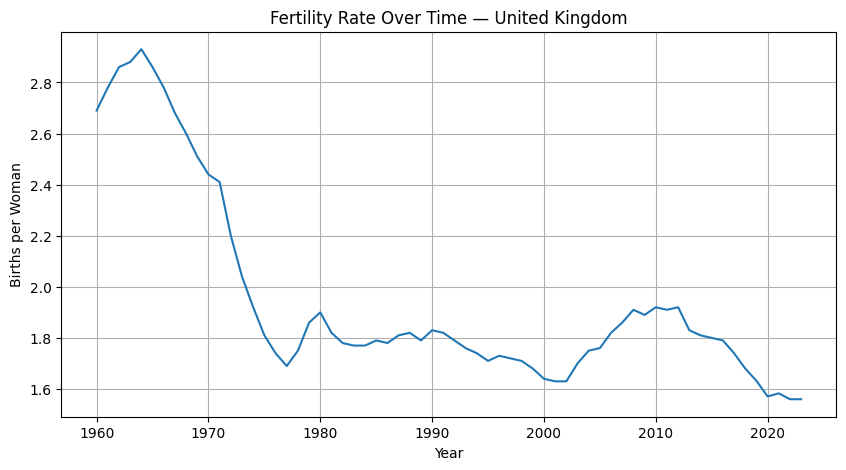

In [17]:
country = "United Kingdom"   # change this to any country you want

subset = df_long[df_long["Country Name"] == country]

plt.figure(figsize=(10,5))
sns.lineplot(data=subset, x="Year", y="FertilityRate")
plt.title(f"Fertility Rate Over Time — {country}")
plt.ylabel("Births per Woman")
plt.xlabel("Year")
plt.grid(True)
plt.show()
fig = px.line(subset, x="Year", y="FertilityRate", title=f"Fertility Rate Over Time — {country}",
              labels={"FertilityRate": "Births per Woman"})

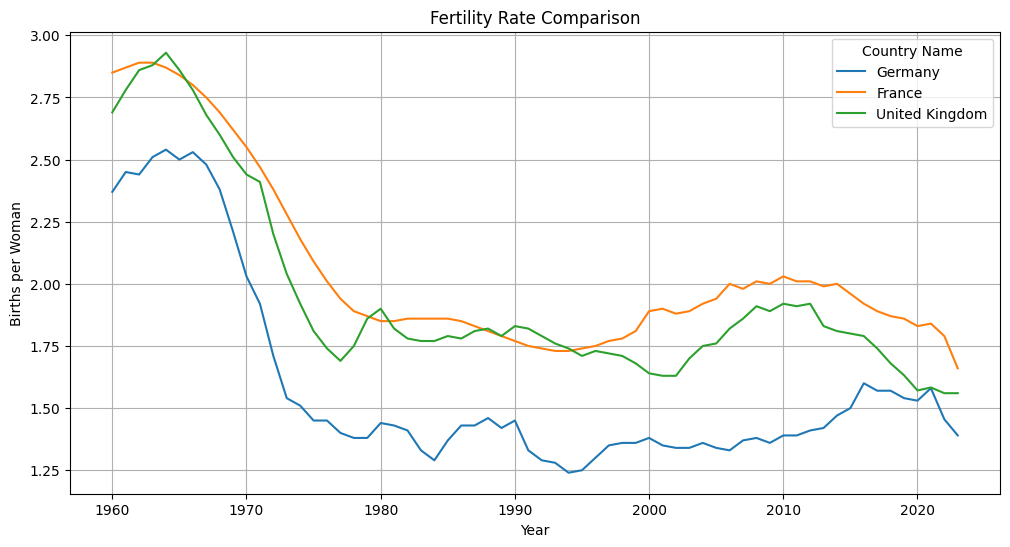

In [18]:
countries = ["United Kingdom", "France", "Germany"]  # edit freely

subset = df_long[df_long["Country Name"].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x="Year", y="FertilityRate", hue="Country Name")
plt.title("Fertility Rate Comparison")
plt.ylabel("Births per Woman")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [19]:
year = 2020 ##Specify the year you want to analyze

top10 = (
    df_long[df_long["Year"] == year]
    .sort_values("FertilityRate", ascending=False)
    .head(10)
)

top10 ###Display the top 10 countries with highest fertility rates in the specified year


,Country Name,Country Code,Indicator Name,Year,FertilityRate
16173,"Somalia, Fed. Rep.",SOM,"Fertility rate, total (births per woman)",2020,6.453
16133,Niger,NER,"Fertility rate, total (births per woman)",2020,6.369
16189,Chad,TCD,"Fertility rate, total (births per woman)",2020,6.346
16003,"Congo, Dem. Rep.",COD,"Fertility rate, total (births per woman)",2020,6.206
15994,Central African Republic,CAF,"Fertility rate, total (births per woman)",2020,6.059
16118,Mali,MLI,"Fertility rate, total (births per woman)",2020,5.850
15964,Angola,AGO,"Fertility rate, total (births per woman)",2020,5.371
15976,Burundi,BDI,"Fertility rate, total (births per woman)",2020,5.177
15962,Afghanistan,AFG,"Fertility rate, total (births per woman)",2020,5.145
16125,Mozambique,MOZ,"Fertility rate, total (births per woman)",2020,4.959


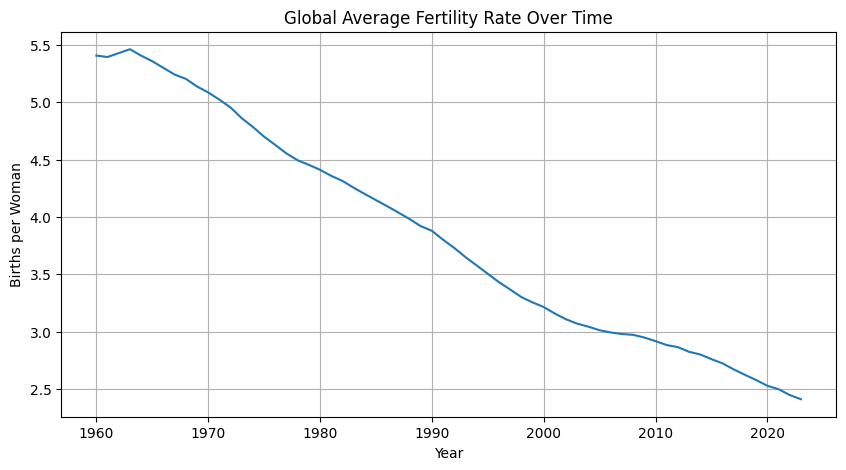

In [20]:
global_trend = (
    df_long.groupby("Year")["FertilityRate"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=global_trend, x="Year", y="FertilityRate")
plt.title("Global Average Fertility Rate Over Time")
plt.ylabel("Births per Woman")
plt.xlabel("Year")
plt.grid(True)
plt.show() 


In [21]:
numeric_cols = df.select_dtypes(include=["number"]).columns ###Get list of numeric columns



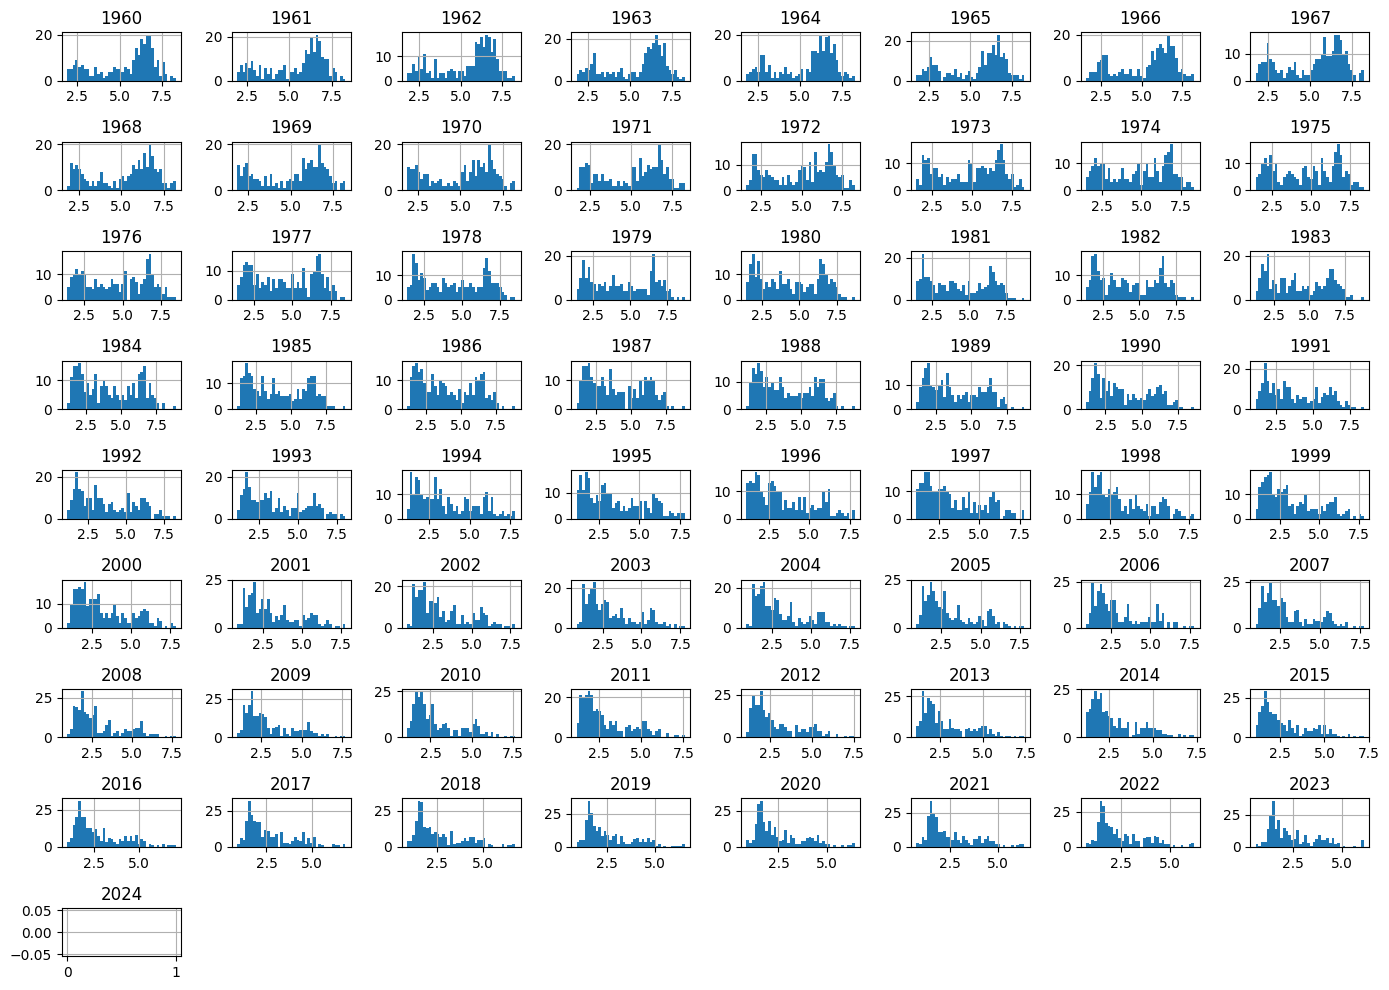

In [22]:

df[numeric_cols].hist(bins=40, figsize=(14,10)) ##Plot histograms for numeric columns
plt.tight_layout() 

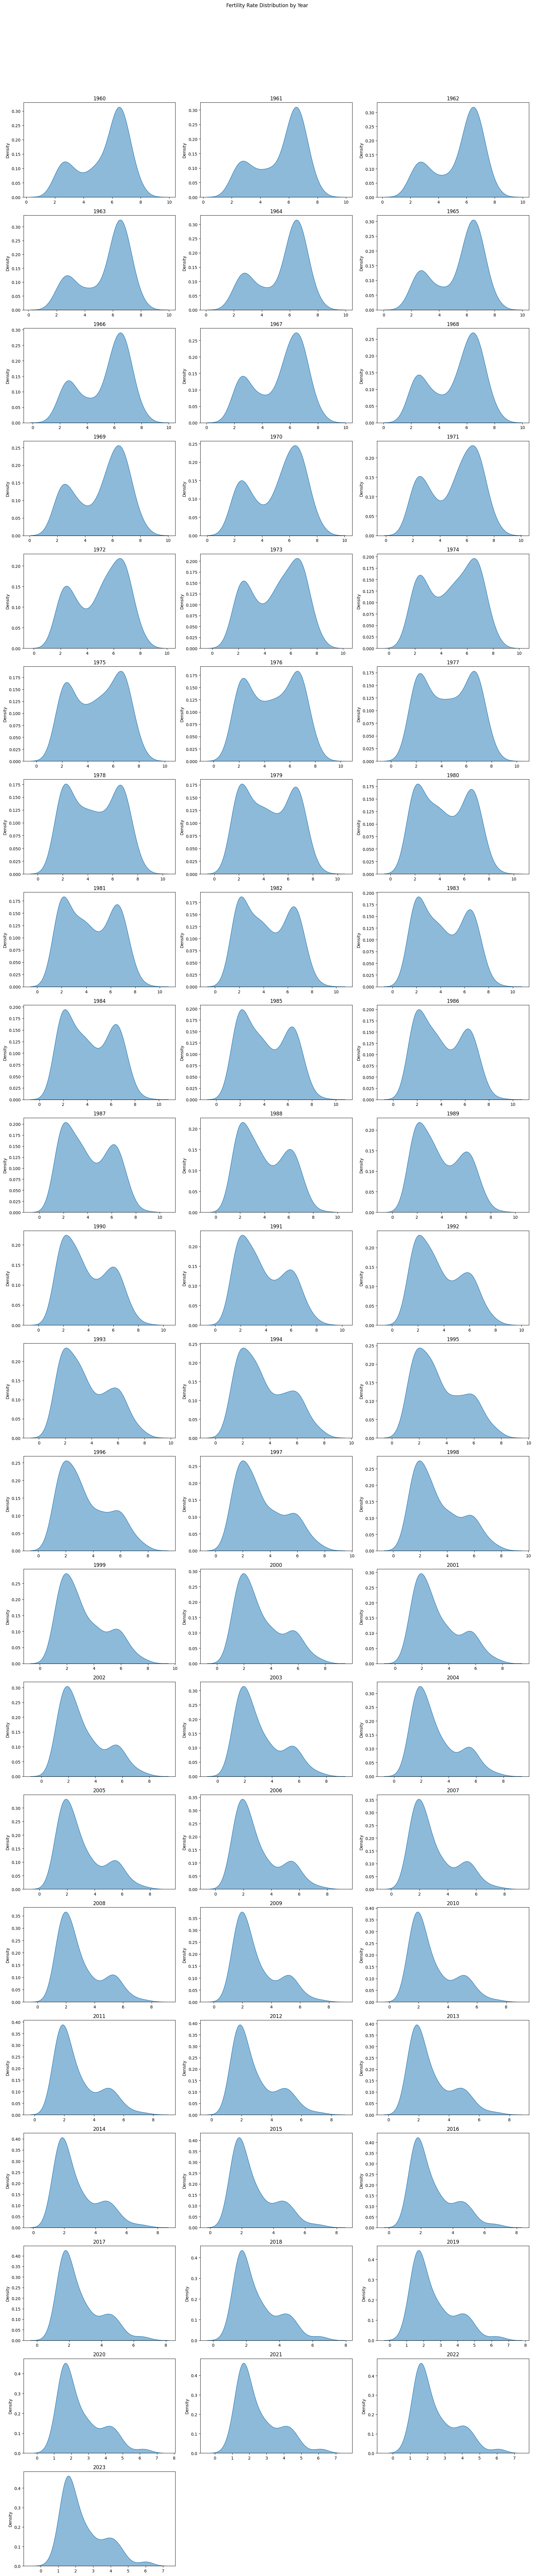

In [23]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    # Drop NaNs to avoid seaborn warnings
    data = df[col].dropna()

    # Skip columns with no valid data
    if data.empty:
        ax.set_visible(False)
        continue

    sns.kdeplot(
        data=data,
        fill=True,
        alpha=0.5,
        ax=ax
    )

    ax.set_title(col, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Density")

# Hide any unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.suptitle("Fertility Rate Distribution by Year")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [24]:
highest_each_year = df.melt(
    id_vars=["Country Name"],
    value_vars=numeric_cols,
    var_name="Year",
    value_name="FertilityRate"
).sort_values(["Year", "FertilityRate"], ascending=[True, False]).groupby("Year").first() ##Get country with highest fertility rate each year

highest_each_year.head()

,Country Name,FertilityRate
Year,,
1960,Rwanda,8.283
1961,Rwanda,8.279
1962,Rwanda,8.271
1963,Rwanda,8.269
1964,Rwanda,8.266


In [25]:
df_2020 = df[["Country Name", "2020"]].dropna().sort_values("2020", ascending=False).head(10) ##Top 10 countries with highest fertility rates in 2020
df_2020

,Country Name,2020
213,"Somalia, Fed. Rep.",6.453
173,Niger,6.369
229,Chad,6.346
43,"Congo, Dem. Rep.",6.206
34,Central African Republic,6.059
158,Mali,5.850
4,Angola,5.371
16,Burundi,5.177
2,Afghanistan,5.145
165,Mozambique,4.959


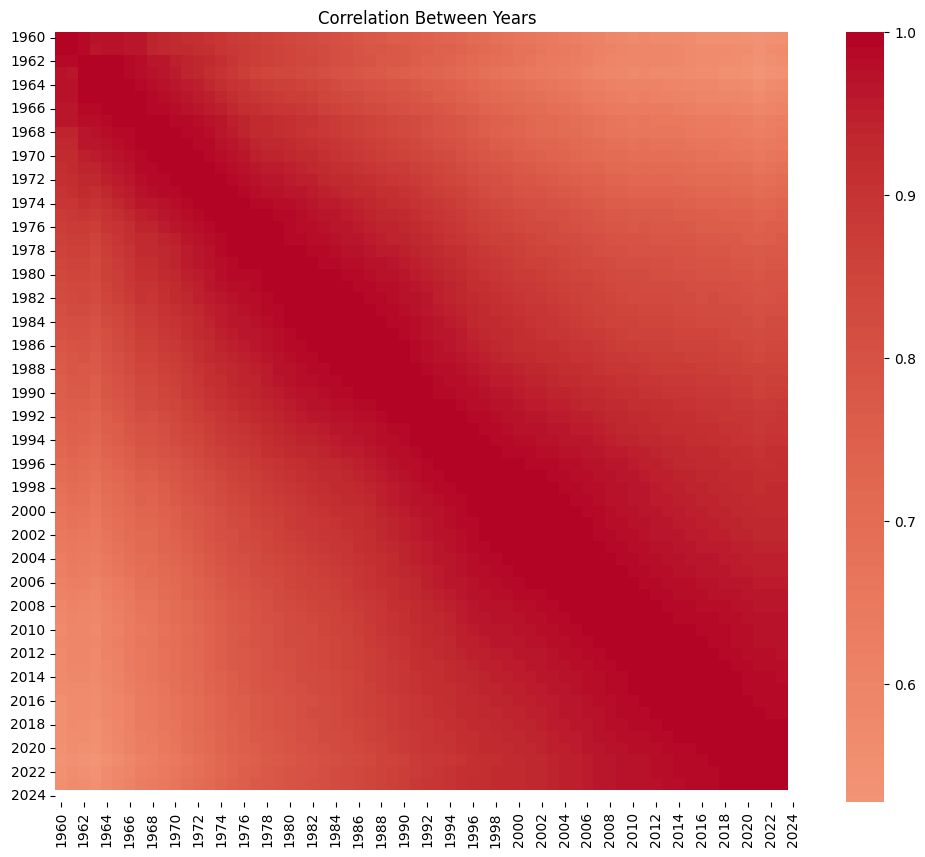

In [26]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Between Years")
plt.show()

In [27]:
[c for c in df.columns if not c.isdigit() and c not in 
 ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]] ##Check non-numeric columns


[]

In [28]:
for col in df.columns:
    print(repr(col))

'Country Name'
'Country Code'
'Indicator Name'
'Indicator Code'
'1960'
'1961'
'1962'
'1963'
'1964'
'1965'
'1966'
'1967'
'1968'
'1969'
'1970'
'1971'
'1972'
'1973'
'1974'
'1975'
'1976'
'1977'
'1978'
'1979'
'1980'
'1981'
'1982'
'1983'
'1984'
'1985'
'1986'
'1987'
'1988'
'1989'
'1990'
'1991'
'1992'
'1993'
'1994'
'1995'
'1996'
'1997'
'1998'
'1999'
'2000'
'2001'
'2002'
'2003'
'2004'
'2005'
'2006'
'2007'
'2008'
'2009'
'2010'
'2011'
'2012'
'2013'
'2014'
'2015'
'2016'
'2017'
'2018'
'2019'
'2020'
'2021'
'2022'
'2023'
'2024'


In [ ]:
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="FertilityRate"
) ##Convert from wide to long format

df_long["Year"] = df_long["Year"].astype(int)
df_long["FertilityRate"] = pd.to_numeric(df_long["FertilityRate"], errors="coerce")

In [30]:
df_long = df_long.drop(columns=["Indicator Code"]) ##Drop unnecessary column

In [31]:
df_long.head()
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17290 non-null  object 
 1   Country Code    17290 non-null  object 
 2   Indicator Name  17290 non-null  object 
 3   Year            17290 non-null  int32  
 4   FertilityRate   16928 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 608.0+ KB


In [ ]:
def slope(series):
    s = series.dropna()
    if len(s) < 2:
        return None
    X = np.arange(len(s)).reshape(-1, 1)
    y = s.values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]


trend = (
    df_long.groupby("Country Name")
           .apply(lambda g: slope(g["FertilityRate"]))
           .dropna()
           .sort_values()
) ##Calculate trend (slope) of fertility rates for each country


In [33]:
top10 = trend.head(10)       # most negative slopes 
bottom10 = trend.tail(10)    # most positive slopes 

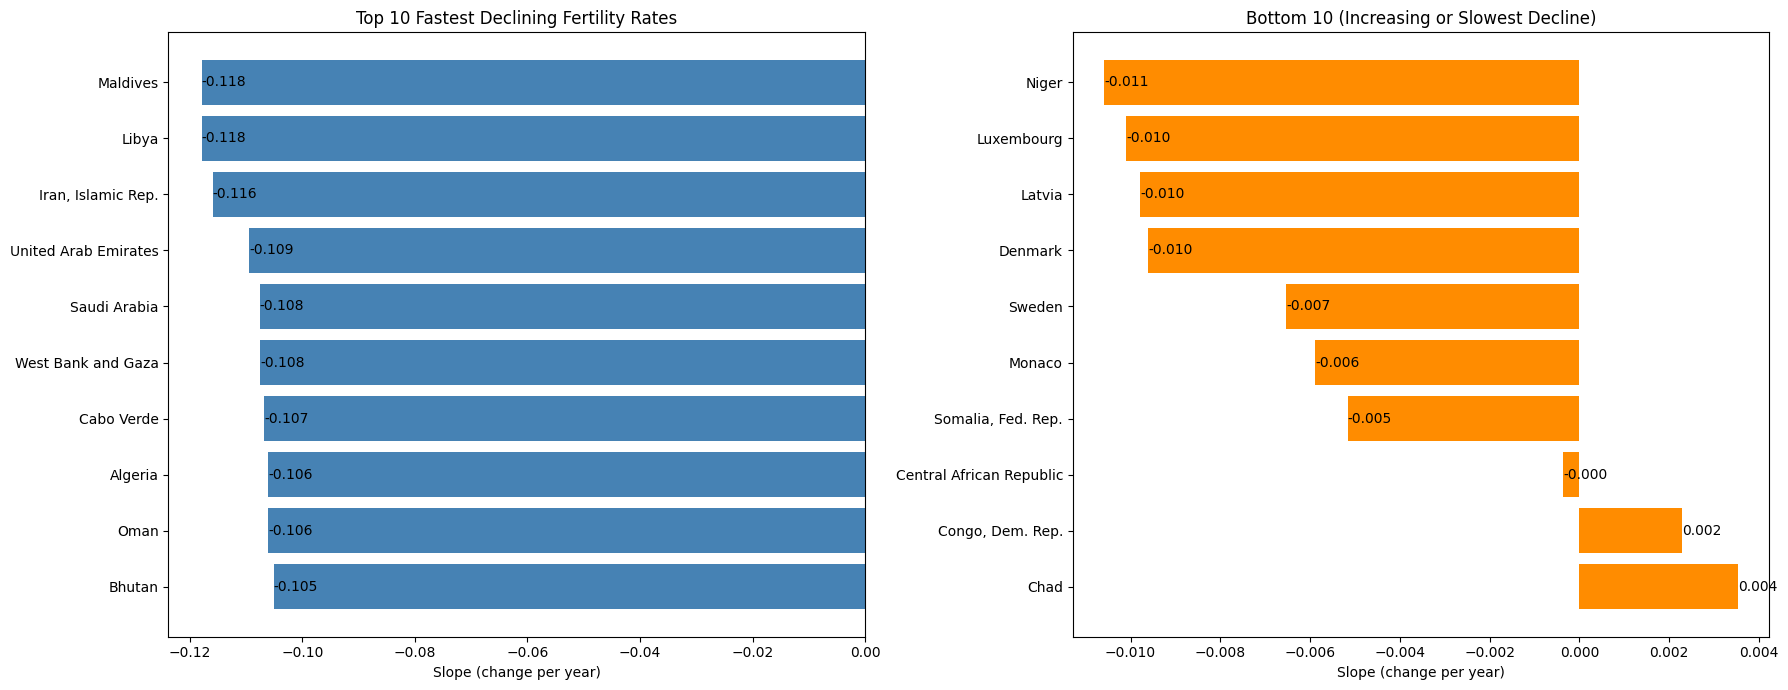

In [34]:
top10 = trend.head(10)
bottom10 = trend.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

##  Left: Fastest decline 
axes[0].barh(top10.index, top10.values, color="steelblue")
axes[0].set_title("Top 10 Fastest Declining Fertility Rates")
axes[0].set_xlabel("Slope (change per year)")
axes[0].invert_yaxis()

# Add annotations
for i, v in enumerate(top10.values):
    axes[0].text(v, i, f"{v:.3f}", va="center", ha="left")

##  Right: Slowest decline / increasing 
axes[1].barh(bottom10.index, bottom10.values, color="darkorange")
axes[1].set_title("Bottom 10 (Increasing or Slowest Decline)")
axes[1].set_xlabel("Slope (change per year)")
axes[1].invert_yaxis()

for i, v in enumerate(bottom10.values):
    axes[1].text(v, i, f"{v:.3f}", va="center", ha="left")

plt.tight_layout()
plt.show()



In [35]:
url = "http://api.worldbank.org/v2/country?format=json&per_page=400" ##World Bank API URL to get country metadata

response = requests.get(url)
data = response.json()   ## this is a list: [metadata, countries]

countries = pd.DataFrame(data[1])  ## second element contains the table

countries["region"] = countries["region"].apply(lambda x: x["value"] if isinstance(x, dict) else None)
countries["incomeLevel"] = countries["incomeLevel"].apply(lambda x: x["value"] if isinstance(x, dict) else None)

regions = countries[["name", "region", "incomeLevel"]].copy()
regions.columns = ["Country Name", "Region", "Income Level"]


In [36]:
trend_df = trend.reset_index()
trend_df.columns = ["Country Name", "Slope"]

trend_with_region = trend_df.merge(regions, on="Country Name", how="left") ##Merge trend data with region data

In [ ]:


fig = px.choropleth(
    trend_with_region,
    locations="Country Name",
    locationmode="country names",
    color="Slope",
    color_continuous_scale="RdBu_r",
    title="Global Fertility Rate Trends (Slope per Year)",
    hover_name="Country Name",
    hover_data=["Region", "Income Level", "Slope"]
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Slope",
        ticks="outside"
    )
)

import plotly.io as pio
pio.renderers.default = "browser"


fig.show()

##This code sets the default renderer for Plotly to open plots in the web browser.